In [2]:
library(ggplot2)
library(dplyr)
library(readxl)
library(tidyr)
library(forcats)
library(jsonlite)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
jsontext <- readLines("CHT_Participant_Survey_Data_7_28.json")
jsons <- lapply(jsontext, fromJSON)
df <- as.data.frame(do.call(rbind, tail(jsons, -1)))
names(df) <- c("participant", "question", "system", "header", "value")
summary(df)

  participant      question           system    
 28     : 530   DEMO   : 462   DIG       :1284  
 13     : 281   1      : 230   N/A       : 539  
 3      : 281   2      : 168   Tellfinder:1296  
 14     : 269   4      : 156                    
 11     : 247   6      : 144                    
 12     : 247   8      : 144                    
 (Other):1264   (Other):1815                    
                                                                                                       header    
 SCORE                                                                                                    : 193  
 Do you feel that this question was operationally relevant or useful in your investigative search process?: 191  
 Please list any comments about the question or workflow.                                                 : 191  
 Post-task Questionnaire                                                                                  : 191  
 Tool Usage [I would have to use anoth

Warning message in evalq(as.integer(as.character(value)), <environment>):
“NAs introduced by coercion”Warning message:
“Removed 11 rows containing non-finite values (stat_boxplot).”

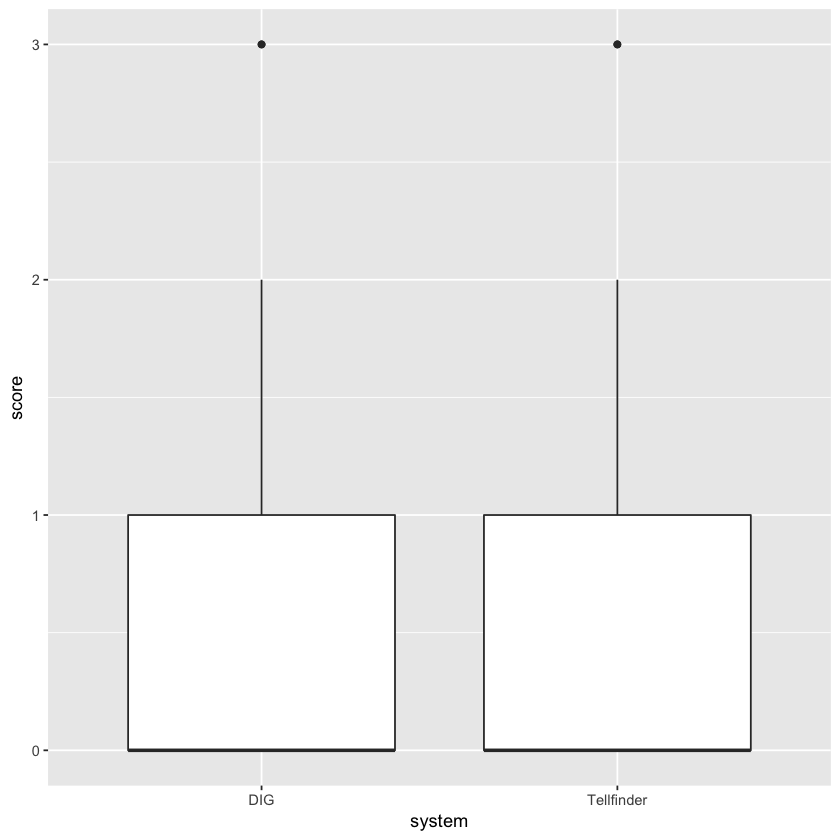

In [4]:
scores <- df %>% 
    filter(header == 'SCORE') %>%
    mutate(score = as.integer(as.character(value)))
ggplot(scores, aes(system, score)) + geom_boxplot()

In [22]:
demog <- df %>% filter(question == 'DEMO') %>%
    mutate(header = fct_recode(header, 
        "participant_id" = "Please enter your participant ID number.åÊ",
        "years_analyst" = "How many years of experience do you have as an analyst or investigator?",
        "years_cht" = "How many years of experience do you have specifically in counter-human-trafficking investigations or analysis?",
        "hours_online" = "How many hours per week do you spend online researching information relating to Counter-HT leads?",
        "dig_exp" = "Tell us about your prior experience using the Memex tools. [Do you have prior experience with this tool? (y/n)][DIG]",
        "tf_exp" = "Tell us about your prior experience using the Memex tools. [Do you have prior experience with this tool? (y/n)][Tellfinder]",
        "dig_years" = "Tell us about your prior experience using the Memex tools. [If so, how long is that experience? (\"NA\", \"# of years\")][DIG]",
        "tf_years" = "Tell us about your prior experience using the Memex tools. [If so, how long is that experience? (\"NA\", \"# of years\")][Tellfinder]",
        "dig_rating" = "Rate your expertise with each tool by on a scale of 1(Basic) to 5(Power User). [DIG]",
        "tf_rating" = "Rate your expertise with each tool by on a scale of 1(Basic) to 5(Power User). [Tellfinder]",
        "other_rating" = "Rate your expertise with other tools used by on a scale of 1(Basic) to 5(Power User). [Other Tools Used]"
    )) %>%
    filter(participant != '') %>%
    mutate(value = fct_collapse(value, 
                                 y = c("y", "Y", "Yes", "yes"),
                                 n = c("n", "N", "No", "no")
                                )) %>%
    select(-question, -system) %>%
    distinct(participant, header, .keep_all = TRUE) %>%
    spread(header, value) %>%
    select(participant, contains("_"))
demog

Warning message:
“Unknown levels in `f`: yes”

participant,hours_online,years_analyst,years_cht,participant_id,dig_rating,tf_rating,other_rating,dig_exp,tf_exp,dig_years,tf_years
11,35,1,1,11,3,4,2,y,y,1,1
12,20,2,2,12,3,4,,y,y,2,1
13,,0.5,0.5,13,,,,,,,
14,10,0,0,14,,,,n,n,NA,NA
16,0 to 40,20,7,16,4,2,3,y,y,2,2
20,20,4,2,20,5,4,4,y,y,1,
22,6-May,21,6,22,1,1,5,y,y,minimal due to uk websites,minimial due to uk websites
26,30,1,1,26,2,4,4,y,y,1,1
27,10-May,1,1,27,4,5,5,y,y,1,1
28,2,13,3,28,1,1,1,n,n,na,na


Joining, by = "participant"
Warning message:
“Removed 11 rows containing non-finite values (stat_boxplot).”Warning message:
“position_dodge requires non-overlapping x intervals”Warning message:
“position_dodge requires non-overlapping x intervals”Warning message:
“position_dodge requires non-overlapping x intervals”

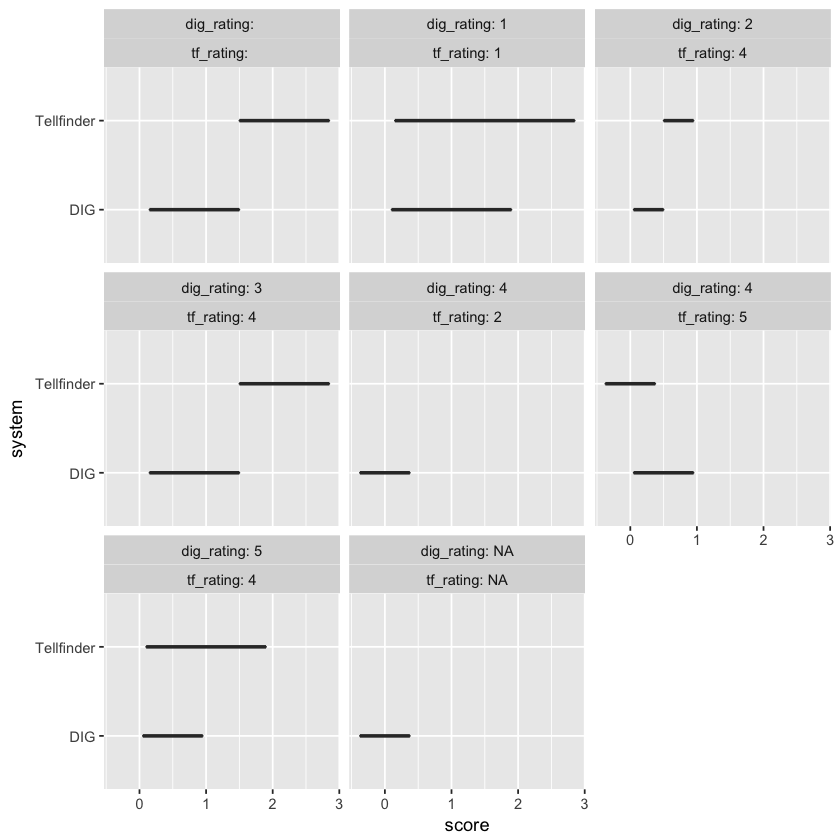

In [29]:
demo_scores <- scores %>% left_join(demog)
ggplot(demo_scores, aes(score, )) + geom_boxplot() + facet_wrap(c("dig_rating", "tf_rating"), labeller="label_both")